# **National Household Transportation Survey and NGSIM Data Analysis**

The objective of this project is to analyze and visualize transportation trends in the United States using the 2022 National Household Transportation Survey (NHTS) dataset and the Next Generation Simulation (NGSIM) dataset. 

# Importing Libraries and Data
This code imports essential Python libraries required for the project. 
Pandas is used for data manipulation. 
Matplotlib and Seaborn  are used for creating the required visualizations of transportation trends and driving behavior.
The raw NHTS and NGSIM data  needs to be imported for anaylsis.
The data needs to be set as a dataframe so python can interpret and manipulate it better.

In [2]:
# Imports the Pandas Library
import pandas as pd

In [3]:
# Imports Matplotlib module
import matplotlib.pyplot as plt

In [4]:
# Imports the Seaborn Package
import seaborn as sns

In [5]:
# Imports the National Household Travel survey
nhts_data = pd.read_csv('NHTS.csv')

In [6]:
# Imports the Next Generation Simulation Data
ngsim_data = pd.read_csv('NGSIM.csv')

In [7]:
# Overwrites the nhts_data to assign it as a data frame to be manipulated later
nhts_data = pd.DataFrame(nhts_data)

In [8]:
# Returns the variable names for the NHTS data
nhts_data.columns

Index(['household_id', 'census_division', 'census_region', 'driver_count',
       'household_income', 'household_size', 'household_workers', 'home_type',
       'household_location', 'number_adults_household',
       'vehicles_per_household', 'travel_date', 'travel_day', 'urban',
       'vehicle_type', 'hybrid', 'make', 'vehicle_age', 'vehicle_commercial',
       'vehicle_delivery', 'vehicle_rideshare', 'fuel_type', 'vehicle_year'],
      dtype='object')

In [9]:
# Returns the variable names for the NGSIM data
ngsim_data.columns

Index(['Time', 'leader_position(m)', 'follower_position(m)',
       'leader_speed(m/s)', 'follower_speed(m/s)', 'leader_acc(m/s^2)',
       'follower_acc(m/s^2)', 'trajectory_number'],
      dtype='object')

# Stacked Bar Chart of Household Location by Vehicles per Household
A stacked bar chart will be created to visualize the distribution of household locations (categorized as rural and urban) based on the number of vehicles per household. The number of vehicles is grouped into five categories: 1, 2, 3, 4, and 5+ vehicles per household, providing insights into vehicle ownership trends across different residential areas.

In [10]:
# Filter out NA values (assuming NA represents missing values)
nhts_data = nhts_data.dropna(subset=['household_location']) 

In [11]:
# Ensure 'vehicles_per_household' is numeric
nhts_data['vehicles_per_household'] = pd.to_numeric(nhts_data['vehicles_per_household'], errors='coerce')

In [12]:
# Drop NA values that were created due to conversion errors
nhts_data = nhts_data.dropna(subset=['vehicles_per_household'])

In [13]:
# Group values 5 and above into a single category
nhts_data['vehicles_per_household'] = nhts_data['vehicles_per_household'].apply(lambda x: '5+' if int(x) >= 5 else str(x))

In [14]:
# Group and count by 'household_location' and 'vehicles_per_household'
data_grouped = nhts_data.groupby(['household_location', 'vehicles_per_household']).size().unstack(fill_value=0)

In [15]:
# Plotting the figure size
plt.figure(figsize=(25,15))

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

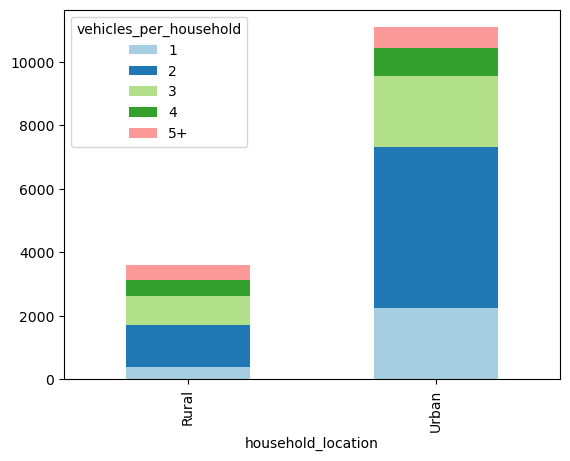

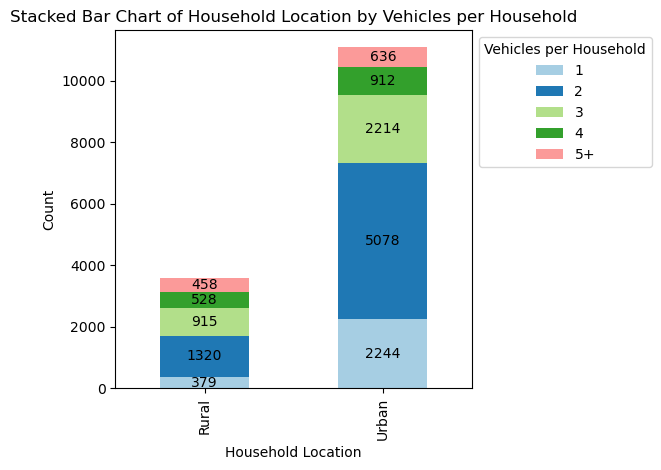

In [16]:
# Plotting stacked bar chart
data_grouped.plot(kind='bar', stacked=True, color = sns.color_palette('Paired',len(data_grouped.columns)))

# Create a stacked bar chart of household location by vehicles per household
ax = data_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('Paired', len(data_grouped.columns)))

# Annotate the bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='black')

# Customize the plot x-axis label
plt.xlabel('Household Location')

# Customize the plot y-axis label
plt.ylabel('Count')

# Customize the chart title
plt.title('Stacked Bar Chart of Household Location by Vehicles per Household')

# Move the legend outside the bounds of the plot
plt.legend(title = 'Vehicles per Household', bbox_to_anchor = (1,1), loc='upper left')

# Adjust plot to make room for the legend
plt.tight_layout()

#Show the plot
plt.show()

# Vehicle Age Histogram
A histogram will be created to visualize the distribution of vehicle age, using the default setting of ten bins and a range of 5 years per bin. 
This will provide insights into the age distribution of vehicles within the dataset.

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Generate a histogram and store the outputs (counts, bin edges, and patches)
counts, bins, patches = plt.hist(nhts_data.vehicle_age, color='teal', edgecolor='black')

# Label the x-axis as Vehicle Age (Years)
plt.xlabel('Vehicle Age (Years)', fontsize=14)

# Label the y-axis as Count
plt.ylabel('Count', fontsize=14)

# Set the title of the histogram
plt.title('Vehicle Age Distribution', fontsize=16)

# Adjust x tick label size for better readability
plt.xticks(fontsize=12)

# Adjust y tick label size for better readability
plt.yticks(fontsize=12)

# Add count labels above each bar
for patch, count in zip(patches, counts):
    plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(count)),
             ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()


# Vehicle Age BoxPlot

A vehicle Age boxplot by day of the week is displayed below. The idea behind creating it is to find a potential correlation between the age of vehicles on the road and the day of the week to gain insight into travel data that may be useful in preparing roadways for a specific type of vehicle.

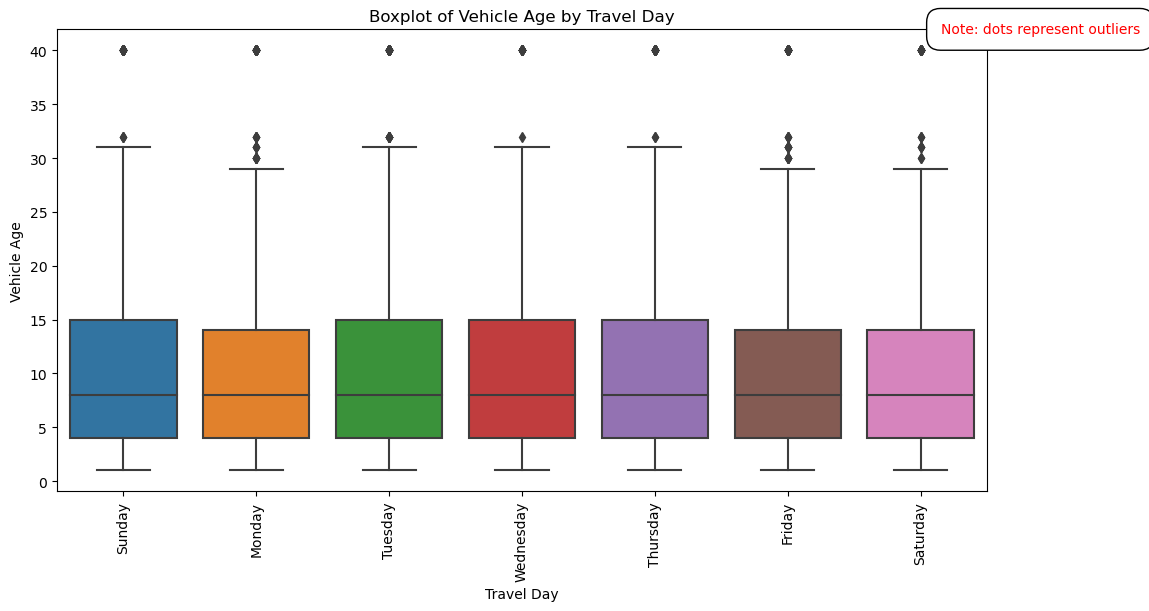

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the correct order of days
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Create the figure
plt.figure(figsize=(12,6))

# Create the boxplot with the correct day order
sns.boxplot(data=nhts_data, x='travel_day', y='vehicle_age', order=day_order)

# Customize the plot
plt.xticks(rotation=90)  # Rotate x-axis labels

plt.xlabel('Travel Day')  # Corrected x-axis label

plt.ylabel('Vehicle Age')  # y-axis label

plt.title('Boxplot of Vehicle Age by Travel Day')  # Title

plt.suptitle('')  # Remove automatic "by group" title

# Add annotation for outliers outside the plot
plt.annotate(
    'Note: dots represent outliers',
    xy=(.95, 1),  # Position the annotation outside the plot
    xycoords='axes fraction',  # Coordinates are relative to the plot's axes
    ha='left',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=10,  # Font size
    color='red',  # Color of the text
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1')  # Box around the annotation
)

# Show the plot
plt.show()

# Speed (m/s) vs time (s) of follower and leader vehicle with 3rd dimension of acceleration of each

The graph below showcases data points on the graph of the speeds of the leader and follower vehicle as time progresses with a third variable of acceleration, specified by the color of the bar to the right-hand side of the plot

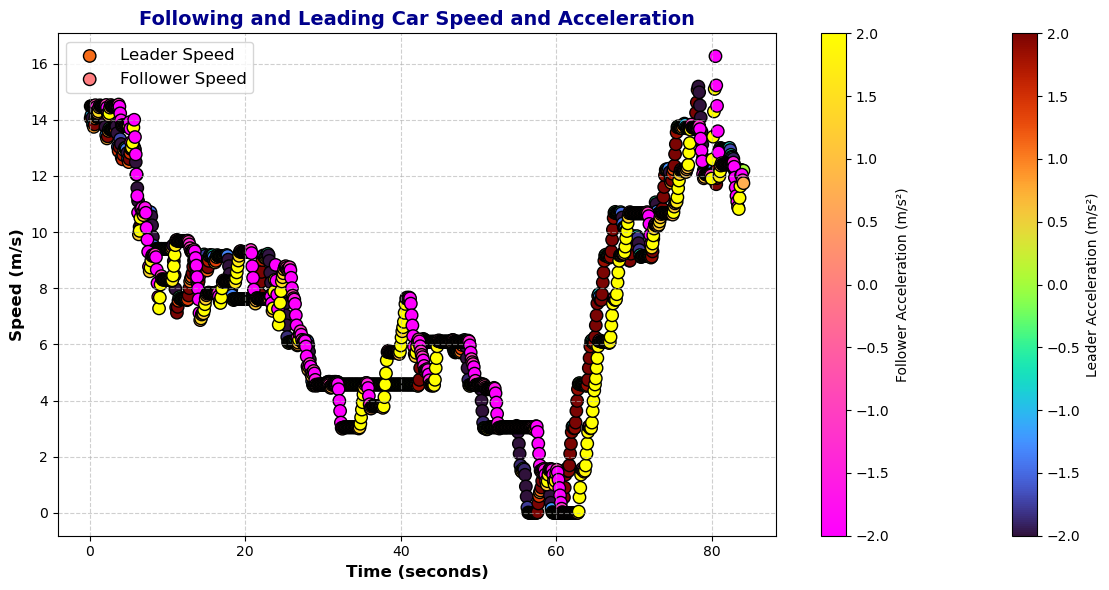

In [53]:
# Specify the pair of vehicles
trajectory_number = 1

# Filter the data based on the chosen pair of vehicles
data_subset = ngsim_data[ngsim_data['trajectory_number'] == trajectory_number]

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for the leader's trajectory, colored by acceleration
sc = plt.scatter(
    data_subset['Time'],
    data_subset['leader_speed(m/s)'],
    c=data_subset['leader_acc(m/s^2)'],
    cmap='turbo',  # Bright, high-energy colormap
    label='Leader Speed',
    edgecolors='black',
    s=80  # Slightly bigger points for visibility
)

# Colorbar for leader's acceleration
cbar1 = plt.colorbar(sc, label='Leader Acceleration (m/s²)')
sc.set_clim(-2, 2)  # Set acceleration limits

# Scatter plot for the follower's trajectory, colored by acceleration
sc2 = plt.scatter(
    data_subset['Time'],
    data_subset['follower_speed(m/s)'],
    c=data_subset['follower_acc(m/s^2)'],
    cmap='spring',  # Bright pink-yellow colormap
    label='Follower Speed',
    edgecolors='black',
    s=80
)

# Colorbar for follower's acceleration
cbar2 = plt.colorbar(sc2, label='Follower Acceleration (m/s²)')
sc2.set_clim(-2, 2)

# Labels and Titles
plt.xlabel('Time (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Speed (m/s)', fontsize=12, fontweight='bold')
plt.title('Following and Leading Car Speed and Acceleration', fontsize=14, fontweight='bold', color='darkblue')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show legend and plot
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()